In [1]:
import numpy as np
from sklearn.cluster import KMeans as sk_kmeans
from sklearn.cluster import KMeans as sk_kmeans
from sklearn.cluster import AgglomerativeClustering as HArchClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
# Generate blob data for showcase visualization
blobX,bloby = make_blobs(n_samples=500, centers=2, random_state=0)


# The three datasets that I've chosen

# Dataset 1: 
# A dataset about observed features of pulsar stars
# Source: http://archive.ics.uci.edu/ml/datasets/HTRU2
# As a reference citing to the The HTRU2 dataset, it was created by and used for:
# R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
# Candidate Selection: From simple filters to a new principled real-time classification approach
# MNRAS, 2016.
# The HTRU2 dataset contains 8 features and a label for each observation.
pulsarData = np.genfromtxt("HTRU_2.csv", delimiter=",", max_rows = 1000)
pulsarX, pulsarY = pulsarData[:,:7] , pulsarData[:,8]

# Dataset 2:
# A dataset about distinguishing between nasal and oral sounds
# Source: https://www.openml.org/search?type=data&sort=runs&status=active&id=1489
# Author (according to the openml page): Dominique Van Cappel, THOMSON-SINTRA
# Contains 5 features and a label, skipping the 10 first rows as they contain description of the features. 
# Also, skip_header cannot be used together with max_rows as per the numpy documentation.
soundsData = np.genfromtxt("php8Mz7BG.arff", delimiter=",", skip_header=10, max_rows=1000)
soundsX, soundsY = soundsData[:,:5], soundsData[:,5]

# Dataset 3:
# Taken from a previous assignment (assignment 2, exercise logistic multivariate regression), banknote-authentication
# Contains 4 features and a label.
bankData = np.genfromtxt("banknote_authentication.csv", delimiter=",", max_rows = 1000)
bankX, bankY = bankData[:,:4], bankData[:,4]

In [3]:
def bkmeans(X, k, iter):
    amntClusters = np.zeros(0)
    clusterLabels = np.zeros(0)
    clusterIndices = np.zeros(0)
    largestCluster = X # Initialization
    
    while len(amntClusters) < k:
  
        # Compute kmeans on the largestcluster 
        kmeans = sk_kmeans(n_clusters = 2, init='random', random_state=2, n_init=iter).fit(largestCluster) # Compute k-means on the data

        if (len(amntClusters) > 1):
            # Labels for the current clustered data (a split of a cluster for example)            
            deltaclusterLabels = kmeans.labels_

            # Replace 0 and 1 in new labels to mostfrequentlabel and mostfrequentlabel+1
            # Using temporary 3rd variable as if the mostfrequentlabel is the same value as the remaining unreplaced
            # values, then all values become identical (an array filled with for example just 1's)
            deltaclusterLabels[deltaclusterLabels == 1] = -1
            deltaclusterLabels[deltaclusterLabels == 0] = mostFrequentLabel
            deltaclusterLabels[deltaclusterLabels == -1] = len(amntClusters)
            
           
            # Couldn't find a more effective way as of yet, to get the indices for the deltaClusterLabels
            # By simply converting a label into an index. Also the structure is altered by this step
            # as the labels may be: 0 1 1 0 0 0 1  --> put most frequent first --> 0 0 0 0 1 1 1
            # However I do not deem this to be a problem for the clustering as it separates the cluster indices 
            deltaClusterIndices0 = np.where(deltaclusterLabels == mostFrequentLabel)[0]
            deltaClusterIndices1 = np.where(deltaclusterLabels == len(amntClusters))[0]
            deltaClusterIndices = np.append(deltaClusterIndices0,deltaClusterIndices1)

            
            # Rearrange the split largest cluster into subclusters by using the indices from the subclusters
            subclusterIndices = largestClusterLabelsIndices[deltaClusterIndices] 
            
            # Find the original positions of each datapoint in the large cluster within the whole set of indices
            sorter = np.argsort(clusterIndices)
            originalIndicesForLargeCluster = sorter[np.searchsorted(clusterIndices, largestClusterLabelsIndices, sorter=sorter)]
    
            clusterIndices[originalIndicesForLargeCluster] = subclusterIndices # Replace the indices
                    
              # Replace the largestcluster labels with the sub-clusters
            clusterLabels[largestClusterLabelsIndices] = deltaclusterLabels

        else:
            clusterLabels = kmeans.labels_  # Set clusterLabels
            clusterIndices = np.append(np.where(clusterLabels == 0)[0],np.where(clusterLabels == 1)[0]) # Set indices

        # Find the largest cluster by retrieving the most frequent label on the clustered data    
        value, count = np.unique(clusterLabels, return_counts=True)
        mostFrequentLabel = value[np.argmax(count)]
        
        # Find the largest cluster indices by checking which label is most frequent
        largestClusterLabelsIndices = np.where(clusterLabels == mostFrequentLabel)[0] 
        largestClusterLabels = clusterLabels[clusterLabels == mostFrequentLabel]
        
        # Create a sub-matrix of X that contains only the observations in the largest cluster
        largestCluster = X[largestClusterLabelsIndices]   
        
        # Update the current amount of clusters
        amntClusters = np.unique(clusterLabels)
        
    # My function can also return the lables for each cluster (as I save the sklearn-kmeans output). However as the assignment
    # states that it should output only the indices, I do not return the lables (which means I have to manually add labels later)
    return clusterIndices

In [4]:
# Manually add labels to clusters (brute force adding them by using the format of the indices returned from the bkmeans function)
def createClusterLabels(lst):
    appendLst = []
  
    for indx in range(len(lst)):
        lstVals = np.unique(appendLst)
        if len(lstVals) > 0:
            if indx > 1:
                if lst[indx-1] > lst[indx]:
                    appendLst = np.append(appendLst,len(lstVals))
                else:
                    appendLst = np.append(appendLst,lstVals[len(lstVals)-1])
            else:
                appendLst = np.append(appendLst,lstVals[len(lstVals)-1])
        else:
            appendLst = np.append(appendLst,0)
    return appendLst

In [5]:
blob_clusterIndices = bkmeans(blobX, 3, 10)
blob_clusterLabels  = createClusterLabels(blob_clusterIndices)
# Due to the process of manually adding labels to the clusters, I have to sort the X data into the clusters to display the output
blobX_clustered = blobX[blob_clusterIndices]

Text(0.5, 1.0, 'B-kmeans Clustered Blob data')

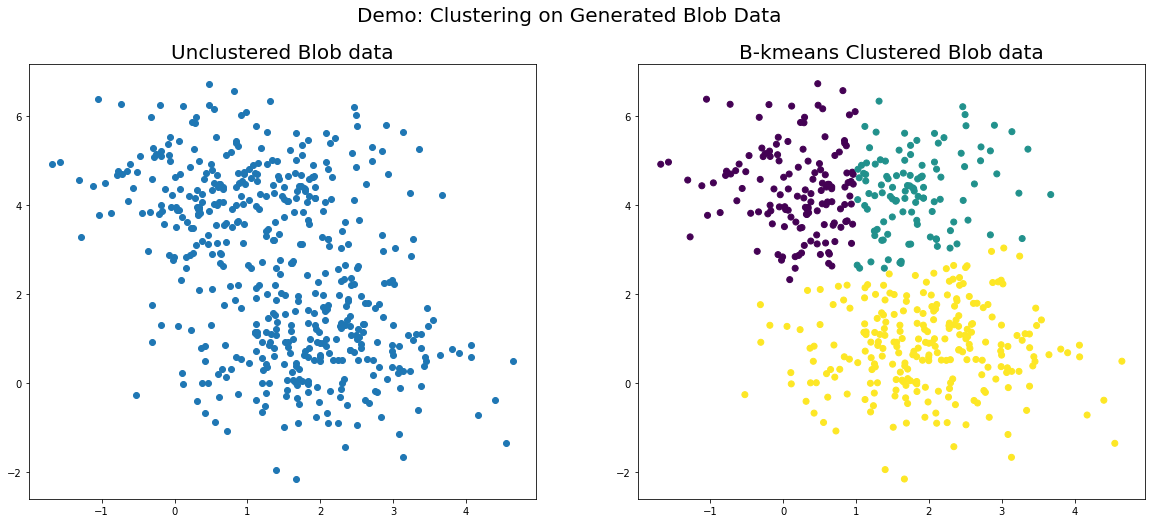

In [6]:
row, col = 1, 2
fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(20,8))
fig.suptitle("Demo: Clustering on Generated Blob Data", size=20)

axes[0].scatter(blobX[:,0], blobX[:,1])
axes[0].set_title("Unclustered Blob data", size=20)
axes[1].scatter(blobX_clustered[:,0], blobX_clustered[:,1], c=blob_clusterLabels)
axes[1].set_title("B-kmeans Clustered Blob data", size=20)

The plots above displays the 3 clusters output from my Bkmeans implementation, which shows that it works as intended. The make_blobs datasets were used to visually see my progression with the bkmeans implementation. (I used them to plot the output each iteration, when working on my implementation). As such I keep them here to display what I used to test and verify my implementation. 

c:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: Fu

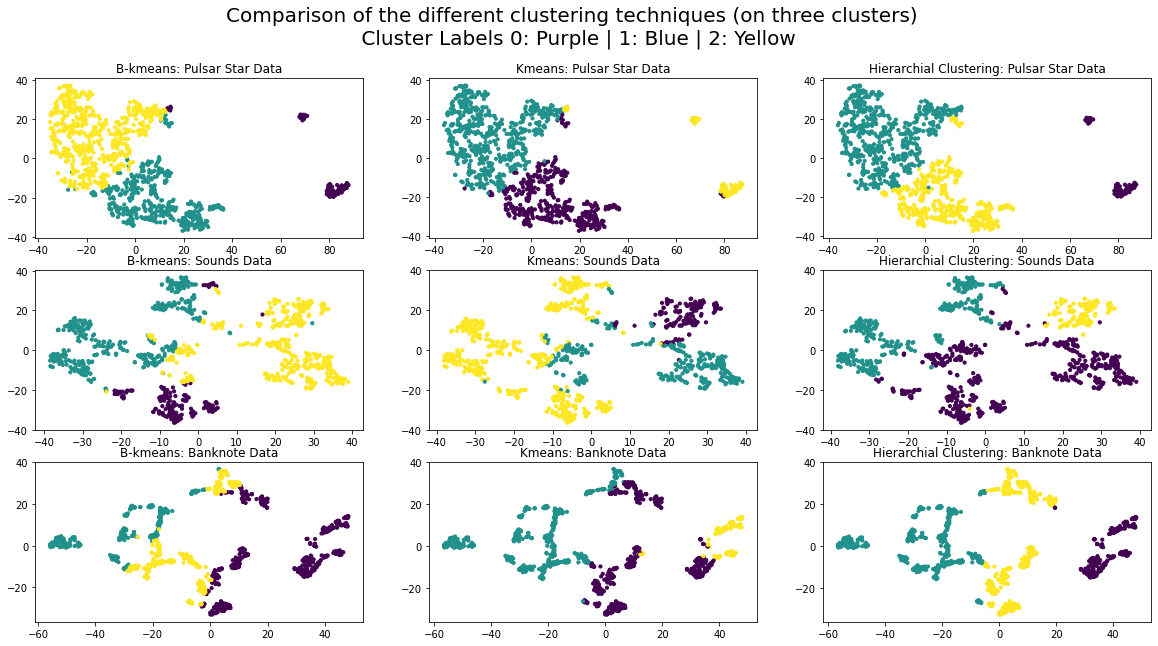

In [8]:
datasetLst, datasetIndx = [[pulsarX,pulsarY], [soundsX,soundsY], [bankX,bankY]], 0
nameLst = ["Pulsar Star Data", "Sounds Data", "Banknote Data"]
fig, axes = plt.subplots(3, 3, figsize=(20,10))
fig.suptitle("Comparison of the different clustering techniques (on three clusters) \n Cluster Labels 0: Purple | 1: Blue | 2: Yellow", size=20)

for row in axes:
    X = datasetLst[datasetIndx][0]
    bKmeans_clusterIndices = bkmeans(X, 3, 10)
    bKmeans__clusterLabels  = createClusterLabels(bKmeans_clusterIndices)
    bkmeans_clusteredX = X[bKmeans_clusterIndices]

    kmeans_labels = sk_kmeans(n_clusters = 3, init='random', random_state=2, n_init=10).fit(X).labels_
    hierachial_labels = HArchClustering(n_clusters = 3).fit(X).labels_

    TSNEResult = TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(X)
    bkmeans_TSNEResult = TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(bkmeans_clusteredX)
    
    row[0].scatter(bkmeans_TSNEResult[:,0], bkmeans_TSNEResult[:,1], c=bKmeans__clusterLabels, s=10)
    row[0].set_title("B-kmeans: " + nameLst[datasetIndx])
    row[1].scatter(TSNEResult[:,0], TSNEResult[:,1],   c=kmeans_labels,  s=10)
    row[1].set_title("Kmeans: " + nameLst[datasetIndx])
    row[2].scatter(TSNEResult[:,0], TSNEResult[:,1],   c=hierachial_labels, s=10)
    row[2].set_title("Hierarchial Clustering: "+ nameLst[datasetIndx])
    datasetIndx += 1

plt.show()

When viewing the output results for the three clustering techniques, I can see that the results are pretty similar. However, bisecting k-means (my implementation) had more singular values from other clusters, within another cluster. As with some stray blue labels in the yellow labels in the sounds Data plot. I would say that I deem the Hierarchial clustering technique to be the best performing upon these three datasets. As it had the least amount of singular values in other clusters. For example, k-means had problems separating the yellow and blue clusters in the sounds data. I also find that the separation between clusters is more evident with the hierarchial clustering. For example in the banknote dataset, the purple cluster is separate from the other data, exluding the singular value misplaced in the yellow cluster.